c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


KeyError: 'South Carolina'

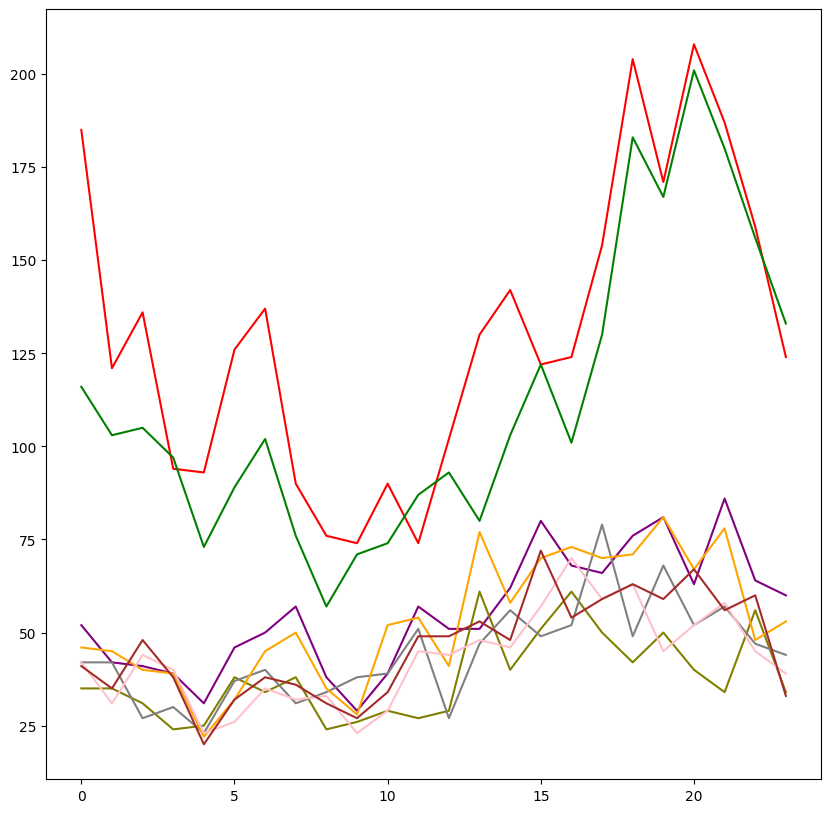

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import bigquery

# Conexión al cliente de BigQuery
client = bigquery.Client(project='poto-382221')

# Consulta SQL
query = """
SELECT
    state_name,
    EXTRACT(HOUR FROM timestamp_of_crash) AS hour,
    COUNT(*) AS num_accidents
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
WHERE state_name IN (
    SELECT state_name
    FROM (
        SELECT 
            state_name,
            SUM(number_of_fatalities) AS total_fatalities
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY state_name
        ORDER BY total_fatalities DESC
        LIMIT 10
    )
)
GROUP BY state_name, hour
ORDER BY state_name, hour
"""

# Ejecutar la consulta
query_job = client.query(query)
results = query_job.result()

# Convertir los resultados a un dataframe de Pandas
results_df = results.to_dataframe()

# Crear un diccionario para mapear los nombres de los estados a un color
state_colors = {
    'California': 'red',
    'Texas': 'blue',
    'Florida': 'green',
    'Georgia': 'purple',
    'North Carolina': 'orange',
    'Pennsylvania': 'brown',
    'Ohio': 'pink',
    'New York': 'gray',
    'Illinois': 'olive',
    'Michigan': 'cyan'
}

# Crear un gráfico de líneas para cada estado
fig, axs = plt.subplots(figsize=(10, 10))

for state in results_df['state_name'].unique():
    state_data = results_df[results_df['state_name'] == state]
    axs.plot(state_data['hour'], state_data['num_accidents'], label=state, color=state_colors[state])

# Configurar la leyenda, los títulos y las etiquetas de los ejes
axs.set_title('Número de accidentes por hora y estado (2015)')
axs.set_xlabel('Hora')
axs.set_ylabel('Número de accidentes')
axs.legend()

# Mostrar el gráfico
plt.show()


In [3]:
import plotly.graph_objs as go
from google.cloud import bigquery
client = bigquery.Client(project='poto-382221')
query = """
SELECT
    state_name,
    EXTRACT(HOUR FROM timestamp_of_crash) AS hour,
    COUNT(*) AS num_accidents
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
WHERE state_name IN (
    SELECT state_name
    FROM (
        SELECT 
            state_name,
            SUM(number_of_fatalities) AS total_fatalities
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY state_name
        ORDER BY total_fatalities DESC
        LIMIT 10
    )
)
GROUP BY state_name, hour
ORDER BY state_name, hour
"""

# Ejecutar la consulta
query_job = client.query(query)
results = query_job.result()

# Convertir los resultados a un dataframe de Pandas
results_df = results.to_dataframe()

# Crear un gráfico de líneas para cada estado
fig = go.Figure()

for state in results_df['state_name'].unique():
    state_data = results_df[results_df['state_name'] == state]
    fig.add_trace(go.Scatter(x=state_data['hour'], y=state_data['num_accidents'], name=state))

# Configurar la leyenda, los títulos y las etiquetas de los ejes
fig.update_layout(
    title='Número de accidentes por hora y estado (2015)',
    xaxis_title='Hora',
    yaxis_title='Número de accidentes',
    legend_title='Estado',
)

# Mostrar el gráfico
fig.show()


Este código usa la función go.Figure() para crear un objeto vacío de datos de Plotly. Luego, usa un bucle for para agregar cada línea al objeto de datos con la función fig.add_trace(go.Scatter()). Finalmente, configura el diseño del gráfico con la función fig.update_layout() y muestra el gráfico con fig.show().

Top 10 estados con mas accidentes, presentados en un grafico que relaciona la cantidad de accidentes segun la hora del dia.
Gran alza de accidentes fuera de horario laboral, con un incremento  que comienza aproximadamente desde las 3 de la tarde manteniendose alto en horario nocturno.
Se despreciaron los demas estados puesto que presentaban un comportamiento similar bajo los 100 accidentes.